查找 -  顺序查找和二分查找
算法：解决问题的方法（步骤）
评价一个算法的好坏主要有两个指标：渐进时间的复杂度，通过一个算法很难做到时间复杂度和空间复杂度表示渐进时间复杂度通常用O标记
O(c)：常量时间复杂度 - 哈希存储 / 布隆过滤器
O(log_2 n)：对数时间复杂度 - 折半查找
O(n)：线性时间复杂度 - 顺序查找
O(n * log_2 n)：- 对数线性时间复杂度 - 高级排序算法（归并排序、快速排序）
O(n ** 2)：平方时间复杂度 - 简单排序算法（冒泡排序、选择排序、插入排序）
O(n ** 3)：立方时间复杂度 - Floyd算法 / 矩阵乘法运算
也称为多项式时间复杂度
O(2 ** n)：几何级数时间复杂度 - 汉诺塔
O(3 ** n)：几何级数时间复杂度
也称为指数时间复杂度
O(n!)：阶乘时间复杂度 - 旅行经销商问题 - NP

In [1]:
from math import log2,factorial
from matplotlib import pyplot

import numpy as np

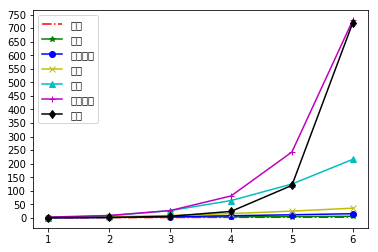

In [4]:
def seq_search(items: list,elem) ->int:
    """顺序查找"""
    for index,item in enumerate(items):
        if elem == item:
            return index
    return -1


def bin_search(items,elem):
    """二分查找"""
    start,end = 0,len(items) - 1
    while start <= end:
        mid = (start + end) // 2
        if elem > items[mid]:
            start = mid + 1
        elif elem < items[mid]:
            end = mid - 1
        else:
            return mid
    return -1



def main():
    
    """主函数（程序入口）"""
    num = 6
    styles = ['r-.', 'g-*', 'b-o', 'y-x', 'c-^', 'm-+', 'k-d']
    legends = ['对数', '线性', '线性对数', '平方', '立方', '几何级数', '阶乘']
    x_data = [x for x in range(1, num + 1)]
    y_data1 = [log2(y) for y in range(1, num + 1)]
    y_data2 = [y for y in range(1, num + 1)]
    y_data3 = [y * log2(y) for y in range(1, num + 1)]
    y_data4 = [y ** 2 for y in range(1, num + 1)]
    y_data5 = [y ** 3 for y in range(1, num + 1)]
    y_data6 = [3 ** y for y in range(1, num + 1)]
    y_data7 = [factorial(y) for y in range(1, num + 1)]
    y_datas = [y_data1, y_data2, y_data3, y_data4, y_data5, y_data6, y_data7]
    for index, y_data in enumerate(y_datas):
        pyplot.plot(x_data, y_data, styles[index])
    pyplot.legend(legends)
    pyplot.xticks(np.arange(1, 7, step=1))
    pyplot.yticks(np.arange(0, 751, step=50))
    pyplot.show()
    

    
if __name__ =='__main__':
    main()

排序 - -冒泡排序，选择排序，归并排序，快速排序
冒泡排序：两两比较，大的下沉- O(n ** 2)
选择排序：每次从剩下元素中选择最小- O(n ** 2)
归并排序：高级排序算法-O(n * log_2 n)
快速排序：以枢轴为界将列表中的元素划分为两个部分，左边都比枢轴小，右边都比枢大

In [7]:
class Person(object):
    """人"""
    def __init__(self,name,age):
        self.name = name
        self.age = age
        
    def _str_(self):
        return f'{self.name}: {self.age}'
    
    def __repr__(self):
        return self._str_()
    
def select_sort(origin_items,comp=lambda x,y: x< y):
    """简单选择排序"""
    items = origin_items[:]
    for i in range(len(items) - 1):
        min_index = i
        for j in range(i + 1,len(items)):
            if comp(items[j],items[min_index]):
                min_index = j
        items[i],items[min_index] = items[min_index],items[i]
    return items


def main():
    """主函数"""
    items = [35, 97, 12, 68, 55, 73, 81, 40]
    print(select_sort(items))
    items2 = [
        Person('Wang', 25), Person('Luo', 39),
        Person('Zhang', 50), Person('He', 20)
    ]
    print(select_sort(items2, comp=lambda p1, p2: p1.name < p2.name))
    
    
    
if __name__ == '__main__':
    main()
          

[12, 35, 40, 55, 68, 73, 81, 97]
[He: 20, Luo: 39, Wang: 25, Zhang: 50]


In [8]:
def bubble_sort(origin_items, *, comp=lambda x, y: x > y):
    """冒泡排序"""
    items = origin_items[:]
    for i in range(1, len(items)):
        swapped = False
        for j in range(i - 1, len(items) - i):
            if comp(items[j], items[j + 1]):
                items[j], items[j + 1] = items[j + 1], items[j]
                swapped = True
        if swapped:
            swapped = False
            for j in range(len(items) - i - 1, i - 1, -1):
                if comp(items[j - 1], items[j]):
                    items[j], items[j - 1] = items[j - 1], items[j]
                    swapped = True
        if not swapped:
            break
    return items
def main():
    """主函数"""
    items = [35, 97, 12, 68, 55, 73, 81, 40]
    print(bubble_sort(items))
    items2 = [
        Person('Wang', 25), Person('Luo', 39),
        Person('Zhang', 50), Person('He', 20)
    ]
    print(bubble_sort(items2, comp=lambda p1, p2: p1.age > p2.age))
    
    
if __name__ == '__main__':
    main()

[12, 35, 40, 55, 68, 73, 81, 97]
[He: 20, Wang: 25, Luo: 39, Zhang: 50]


In [10]:
def merge_sort(items, comp=lambda x, y: x <= y):
    """归并排序"""
    if len(items) < 2:
        return items[:]
    mid = len(items) // 2
    left = merge_sort(items[:mid], comp)
    right = merge_sort(items[mid:], comp)
    return merge(left, right, comp)


def merge(items1, items2, comp=lambda x, y: x <= y):
    """合并（将两个有序列表合并成一个新的有序列表）"""
    items = []
    index1, index2 = 0, 0
    while index1 < len(items1) and index2 < len(items2):
        if comp(items1[index1], items2[index2]):
            items.append(items1[index1])
            index1 += 1
        else:
            items.append(items2[index2])
            index2 += 1
    items += items1[index1:]
    items += items2[index2:]
    return items



def main():
    """主函数"""
    items = [35, 97, 12, 68, 55, 73, 81, 40]
    print(merge_sort(items))
    items2 = [
        Person('Wang', 25), Person('Luo', 39),
        Person('Zhang', 50), Person('He', 20)
    ]
    
if __name__ == '__main__':
    main()

[12, 35, 40, 55, 68, 73, 81, 97]


In [12]:
def quick_sort(origin_items, comp=lambda x, y: x <= y):
    """快速排序"""
    items = origin_items[:]
    _quick_sort(items, 0, len(items) - 1, comp)
    return items


def _quick_sort(items, start, end, comp):
    """递归调用划分和排序"""
    if start < end:
        pos = _partition(items, start, end, comp)
        _quick_sort(items, start, pos - 1, comp)
        _quick_sort(items, pos + 1, end, comp)


def _partition(items, start, end, comp):
    """划分"""
    pivot = items[end]
    i = start - 1
    for j in range(start, end):
        if comp(items[j], pivot):
            i += 1
            items[i], items[j] = items[j], items[i]
    items[i + 1], items[end] = items[end], items[i + 1]
    return i + 1

def main():
    """主函数"""
    items = [35, 97, 12, 68, 55, 73, 81, 40]
    print(quick_sort(items))
    items2 = [
        Person('Wang', 25), Person('Luo', 39),
        Person('Zhang', 50), Person('He', 20)
    ]
    print(quick_sort(items2, comp=lambda p1, p2: p1.age <= p2.age))
    items3 = ['apple', 'orange', 'watermelon', 'durian', 'pear']
    print(merge_sort(items3))

        
if __name__ =='__main__':
    main()

[12, 35, 40, 55, 68, 73, 81, 97]
[He: 20, Wang: 25, Luo: 39, Zhang: 50]
['apple', 'durian', 'orange', 'pear', 'watermelon']


函数递归调用 - 函数直接或间接的调用了自身
1，收敛条件
2，递归公式
n! = n * (n-1)!
f(n) = f(n-1) + f(n-2)
1 1 2 3 5 8 13 21 34 55 ...

In [13]:
from contextlib import contextmanager
from time import perf_counter

In [14]:
def fac(num):
    """求阶乘"""
    assert num >=0
    if num in (0,1):
        return 1
    return num * fac(num - 1)


def fib2(num):
    """普通函数"""
    a, b = 1, 1
    for _ in range(num - 1):
        a, b = b, a + b
        return a
    
def fib3(num):
    """生成器"""
    a, b = 0, 1
    for _ in range(num):
        a,b = b, a + b
        yield a
        
        
# 动态规划 - 保存可能进行重复运算的中间结果（空间换时间）
def fib(num, results={}):
    """斐波那锲数列"""
    assert num > 0
    if num in (1,2):
        return 1
    try:
        return results[num]
    except KeyError:
        results[num] = fib(num - 1) + fib(num - 2)
        return results[num]
    
    
@contextmanager
def timer():
    try:
        start = perf_counter()
        yield
    finally:
        end = perf_counter()
        print(f'{end - start}秒')
        
def main():
    for num in range(1, 121):
        with timer():
            print(f'{num}: {fib(num)}')
            
            
if __name__ == '__main__':
    main()

1: 1
0.00014104665788181064秒
2: 1
2.5741015063430453e-05秒
3: 2
2.785671493165759e-05秒
4: 3
2.4683165129316858e-05秒
5: 5
1.7630832235226296e-05秒
6: 8
1.79834488799309e-05秒
7: 13
1.7630832235226296e-05秒
8: 21
1.4809899077590115e-05秒
9: 34
1.2341582564658429e-05秒
10: 55
2.5741015063430453e-05秒
11: 89
2.6798864997544048e-05秒
12: 144
2.6446248352839552e-05秒
13: 233
2.7151481642248543e-05秒
14: 377
3.208811466811202e-05秒
15: 610
9.450126078081305e-05秒
16: 987
2.8561948221066634e-05秒
17: 1597
2.6798864997544048e-05秒
18: 2584
2.6446248352839444e-05秒
19: 4181
2.644624835283966e-05秒
20: 6765
2.6446248352839444e-05秒
21: 10946
2.644624835283966e-05秒
22: 17711
2.6798864997544048e-05秒
23: 28657
2.8561948221066634e-05秒
24: 46368
2.9267181510475842e-05秒
25: 75025
2.8914564865771238e-05秒
26: 121393
2.7856714931657643e-05秒
27: 196418
0.0001745452391287408秒
28: 317811
3.4909047825748205e-05秒
29: 514229
2.468316512931664e-05秒
30: 832040
2.679886499754383e-05秒
31: 1346269
1.2341582564658754e-05秒
32: 2178309

贪婪法：在对问题求解时，总是做出在当前看来是最好的选择，
不追求最优解，快速找到满意解。

In [20]:
class Thing(object):
    """物品"""

    def __init__(self, name, price, weight):
        self.name = name
        self.price = price
        self.weight = weight

    @property
    def value(self):
        """价格重量比"""
        return self.price / self.weight


def input_thing():
    """输入物品信息"""
    name_str, price_str, weight_str = input().split()
    return name_str, int(price_str), int(weight_str)


def main():
    """主函数"""
    max_weight, num_of_things = map(int, input().split())
    all_things = []
    for _ in range(num_of_things):
        all_things.append(Thing(*input_thing()))
    all_things.sort(key=lambda x: x.value, reverse=True)
    total_weight = 0
    total_price = 0
    for thing in all_things:
        if total_weight + thing.weight <= max_weight:
            print(f'小偷拿走了{thing.name}')
            total_weight += thing.weight
            total_price += thing.price
    print(f'总价值: {total_price}美元')


if __name__ == '__main__':
    main()

'hua','12','45'


ValueError: invalid literal for int() with base 10: "'hua','12','45'"